### An Analysis on the Depression in California

Depression is one of the most common mental issue in the world. This project uses the data provided by the California Behavioral Risk Factor Surveillance Survey (BRFSS). This project aims to analysis the data to find the which group of adults will has highest chance to has depression. The data will be grouped according to income level, education level, age and races.

- gender analysis
- race analysis
- income analysis
- education analysis

The project is to find out the tendancies of difference apsects and use these tendancies to perform prediction.

### 1. Data visilization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
data = pd.read_csv('adult-depression-lghc-indicator-24.csv')
data

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65
5,2012,Race-Ethnicity,Hispanic,412,923174.0,9.98,8.91,11.05
6,2012,Race-Ethnicity,Asian/Pacific Islander,61,220418.0,5.48,3.92,7.03
7,2012,Race-Ethnicity,Other,36,107786.0,17.34,11.09,23.60
8,2012,Education,No High School Diploma,282,579047.0,14.43,12.60,16.26
9,2012,Education,High School Graduate or GED Certificate,337,665672.0,11.44,9.98,12.89


#### 1.1 Genders

In [3]:
data_male = data[data['Strata Name'].str.strip() == 'Male']
data_female = data[data['Strata Name'].str.strip() == 'Female']
percent_male = data_male['Percent']
percent_female = data_female['Percent']

In [4]:
print("mean of percentage of male:", percent_male.mean())
print("mean of percentage of female:", percent_female.mean())
#print("mean of percentage of all gender:", (percent_male.mean() + percent_female.mean()) / 2)
male_var = np.var(percent_male)
female_var = np.var(percent_female)
print("Variance of percentage of male:", male_var)
print("Variance of percentage of female:", female_var)
print("Different in means:", np.mean(percent_male) - np.mean(percent_female))

mean of percentage of male: 10.638333333333334
mean of percentage of female: 17.205000000000002
Variance of percentage of male: 4.125247222222222
Variance of percentage of female: 7.643124999999995
Different in means: -6.566666666666668


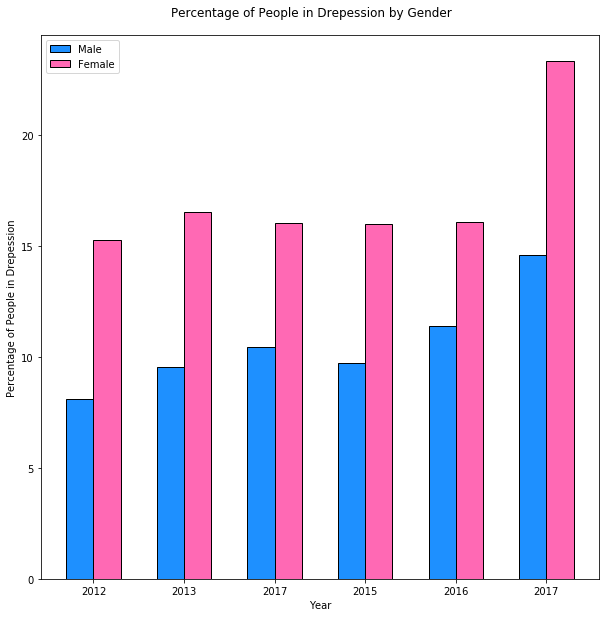

In [5]:
pos = np.arange(6)
bar_width = 0.3
sex = ["Male", "Female"]
fig = plt.figure(figsize = (10, 10))
plt.bar(pos, percent_male, bar_width, color = "dodgerblue", edgecolor = "black")
plt.bar(pos+bar_width, percent_female, bar_width, color = "hotpink", edgecolor = "black")
plt.xticks(pos + bar_width * 0.5, [2012, 2013, 2017, 2015, 2016, 2017])
plt.xlabel("Year")
plt.ylabel("Percentage of People in Drepession")
plt.suptitle("Percentage of People in Drepession by Gender", fontsize = 12, y = 0.92)
plt.legend(sex)

#### 1.2 Education

In [6]:
percent_no_school = data[data['Strata Name'].str.strip() == 'No High School Diploma']['Percent']
percent_high_school = data[data['Strata Name'].str.strip() == 'High School Graduate or GED Certificate']['Percent']
percent_tech_school = data[data['Strata Name'].str.strip() == 'Some College or Tech School']['Percent']
percent_college = data[data['Strata Name'].str.strip() == 'College Graduate or Post Grad']['Percent']

In [7]:
print("mean of percentage of no high school diploma:", percent_no_school.mean())
print("mean of percentage of high school graduate or GED certificate:", percent_high_school.mean())
print("mean of percentage of some college or tech school:", percent_tech_school.mean())
print("mean of percentage of college graduate or post grad:", percent_college.mean())
print("variance of no high school diploma:", np.var(percent_no_school))
print("variance of high school graduate or GED certificate:", np.var(percent_high_school))
print("variance of some college or tech school:", np.var(percent_tech_school))
print("variance of college graduate or post grad:", np.var(percent_college))

mean of percentage of no high school diploma: 13.985
mean of percentage of high school graduate or GED certificate: 14.628333333333332
mean of percentage of some college or tech school: 16.451666666666668
mean of percentage of college graduate or post grad: 12.146666666666668
variance of no high school diploma: 2.2415916666666664
variance of high school graduate or GED certificate: 13.25924722222222
variance of some college or tech school: 9.211247222222225
variance of college graduate or post grad: 3.250922222222222


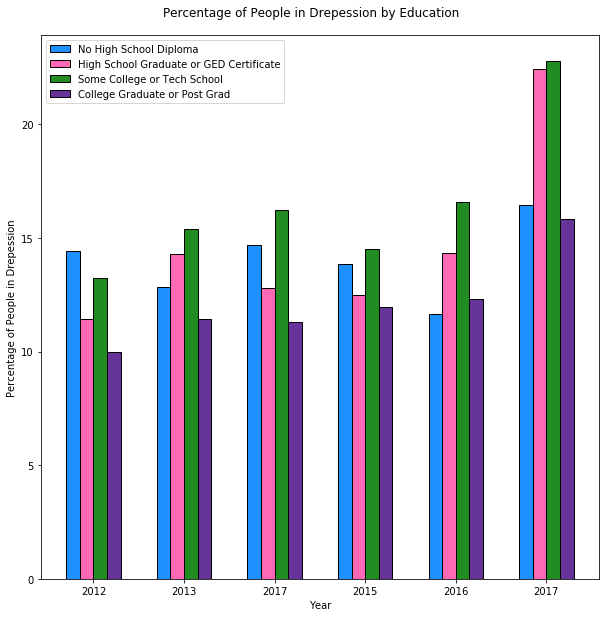

In [8]:
pos = np.arange(6)
bar_width = 0.15
education = ["No High School Diploma", 
             "High School Graduate or GED Certificate", 
             "Some College or Tech School", 
             "College Graduate or Post Grad"]
fig = plt.figure(figsize = (10, 10))
plt.bar(pos, percent_no_school, bar_width, color = "dodgerblue", edgecolor = "black")
plt.bar(pos+bar_width, percent_high_school, bar_width, color = "hotpink", edgecolor = "black")
plt.bar(pos+(bar_width*2), percent_tech_school, bar_width, color = "forestgreen", edgecolor = "black")
plt.bar(pos+(bar_width*3), percent_college, bar_width, color = "rebeccapurple", edgecolor = "black")
plt.xticks(pos + bar_width * 1.5, [2012, 2013, 2017, 2015, 2016, 2017])
plt.xlabel("Year")
plt.ylabel("Percentage of People in Drepession")
plt.suptitle("Percentage of People in Drepession by Education", fontsize = 12, y = 0.92)
plt.legend(education)

From the graph, we cannot really tell which one has the higher tendency being in depression among who has no high school diploma, who has high school graduated or GED and who has some college and tech college. But we can see that the people who has college graduate or post grad has the lower depression percentage than the other three group of people.

#### 1.3 Race-Ethnicity

In [9]:
percent_White = data[data['Strata Name'].str.strip() == 'White']['Percent']
percent_Black = data[data['Strata Name'].str.strip() == 'Black']['Percent']
percent_Hispanic = data[data['Strata Name'].str.strip() == 'Hispanic']['Percent']
percent_Asian = data[data['Strata Name'].str.strip() == 'Asian/Pacific Islander']['Percent']
percent_Other = data[data['Strata Name'].str.strip() == 'Other']['Percent']

In [10]:
print("mean of percentage of White:", percent_White.mean())
print("mean of percentage of Black:", percent_Black.mean())
print("mean of percentage of Hispanic:", percent_Hispanic.mean())
print("mean of percentage of Asian/Pacific Islander:", percent_Asian.mean())
print("mean of percentage of Other:", percent_Other.mean())
print("variance of White:", np.var(percent_White))
print("variance of Black:", np.var(percent_Black))
print("variance of Hispanic:", np.var(percent_Hispanic))
print("variance of Asian/Pacific Islander:", np.var(percent_Asian))
print("variance of Other:", np.var(percent_Other))

mean of percentage of White: 17.36
mean of percentage of Black: 13.968333333333334
mean of percentage of Hispanic: 11.575000000000001
mean of percentage of Asian/Pacific Islander: 5.52
mean of percentage of Other: 22.846666666666668
variance of White: 6.705733333333331
variance of Black: 4.2295805555555575
variance of Hispanic: 4.442458333333332
variance of Asian/Pacific Islander: 1.4487666666666665
variance of Other: 26.830955555555565


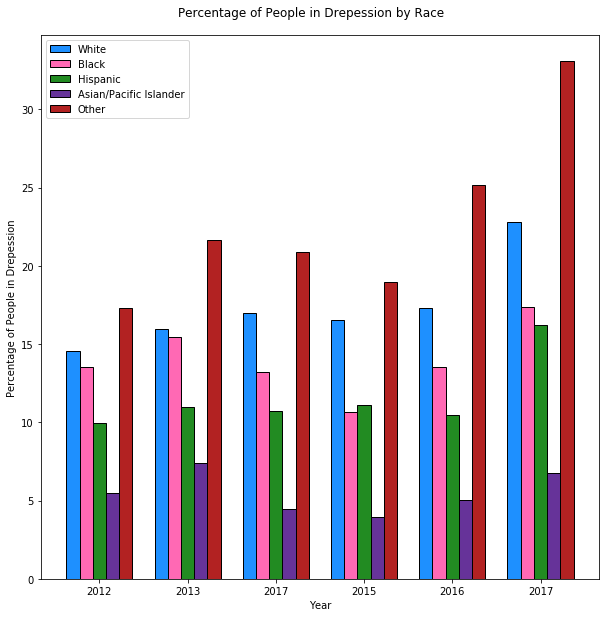

In [11]:
pos = np.arange(6)
bar_width = 0.15
race = ["White", "Black", "Hispanic", "Asian/Pacific Islander", "Other"]
fig = plt.figure(figsize = (10, 10))
plt.bar(pos, percent_White, bar_width, color = "dodgerblue", edgecolor = "black")
plt.bar(pos+bar_width, percent_Black, bar_width, color = "hotpink", edgecolor = "black")
plt.bar(pos+(bar_width*2), percent_Hispanic, bar_width, color = "forestgreen", edgecolor = "black")
plt.bar(pos+(bar_width*3), percent_Asian, bar_width, color = "rebeccapurple", edgecolor = "black")
plt.bar(pos+(bar_width*4), percent_Other, bar_width, color = "firebrick", edgecolor = "black")
plt.xticks(pos + bar_width * 2, [2012, 2013, 2017, 2015, 2016, 2017])
plt.xlabel("Year")
plt.ylabel("Percentage of People in Drepession")
plt.suptitle("Percentage of People in Drepession by Race", fontsize = 12, y = 0.92)
plt.legend(race)

#### 1.4 Income

In [12]:
income_1 = data[data['Strata Name'].str.strip() == '< $20,000']['Percent']
income_2 = data[data['Strata Name'].str.strip() == '$20,000 - $34,999']['Percent']
income_3 = data[data['Strata Name'].str.strip() == '$35,000 - $49,999']['Percent']
income_4 = data[data['Strata Name'].str.strip() == '$50,000 - $74,999']['Percent']
income_5 = data[data['Strata Name'].str.strip() == '$75,000 - $99,999']['Percent']
income_6 = data[data['Strata Name'].str.strip() == '$100,000+']['Percent']

In [13]:
print("mean of income less than $20,000:", income_1.mean())
print("mean of income between $20,000 and $34,999:", income_2.mean())
print("mean of income between $35,000 and $49,999:", income_3.mean())
print("mean of income between $50,000 and $74,999:", income_4.mean())
print("mean of income between $75,000 and $99,999:", income_5.mean())
print("mean of income greater than $100,000:", income_6.mean())
print("Variance of income less than $20,000:", np.var(income_1))
print("Variance of income between $20,000 and $34,999:", np.var(income_2))
print("Variance of income between $35,000 and $49,999:", np.var(income_3))
print("Variance of income between $50,000 and $74,999:", np.var(income_4))
print("Variance of income between $75,000 and $99,999:", np.var(income_5))
print("Variance of income greater than $100,000:", np.var(income_6))

mean of income less than $20,000: 20.669999999999998
mean of income between $20,000 and $34,999: 14.033333333333331
mean of income between $35,000 and $49,999: 13.555
mean of income between $50,000 and $74,999: 13.836666666666668
mean of income between $75,000 and $99,999: 12.33
mean of income greater than $100,000: 10.695
Variance of income less than $20,000: 21.321433333333335
Variance of income between $20,000 and $34,999: 2.639155555555556
Variance of income between $35,000 and $49,999: 6.285591666666665
Variance of income between $50,000 and $74,999: 9.397355555555555
Variance of income between $75,000 and $99,999: 2.456733333333333
Variance of income greater than $100,000: 4.695625


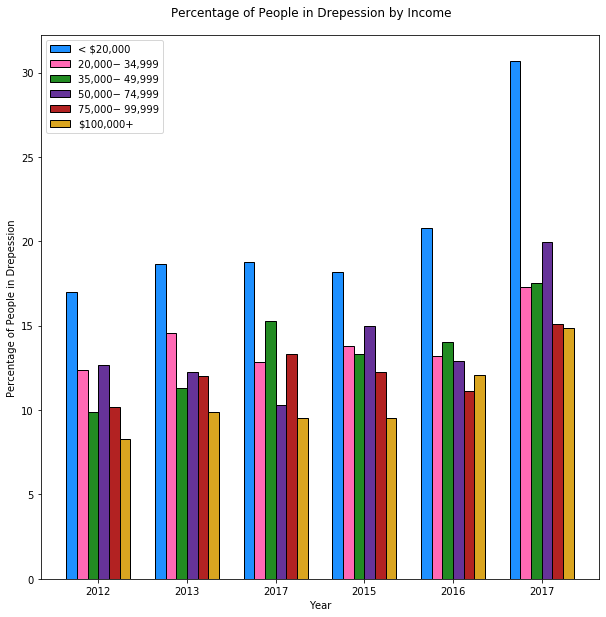

In [14]:
pos = np.arange(6)
bar_width = 0.12
income = ["< $20,000", "20,000− 34,999", "35,000− 49,999", "50,000− 74,999", "75,000− 99,999", "$100,000+"]
fig = plt.figure(figsize = (10, 10))
plt.bar(pos, income_1, bar_width, color = "dodgerblue", edgecolor = "black")
plt.bar(pos+bar_width, income_2, bar_width, color = "hotpink", edgecolor = "black")
plt.bar(pos+(bar_width*2), income_3, bar_width, color = "forestgreen", edgecolor = "black")
plt.bar(pos+(bar_width*3), income_4, bar_width, color = "rebeccapurple", edgecolor = "black")
plt.bar(pos+(bar_width*4), income_5, bar_width, color = "firebrick", edgecolor = "black")
plt.bar(pos+(bar_width*5), income_6, bar_width, color = "goldenrod", edgecolor = "black")
plt.xticks(pos + bar_width * 2.5, [2012, 2013, 2017, 2015, 2016, 2017])
plt.xlabel("Year")
plt.ylabel("Percentage of People in Drepession")
plt.suptitle("Percentage of People in Drepession by Income", fontsize = 12, y = 0.92)
plt.legend(income)

#### 1.5 Age

In [15]:
age_1 = data[data['Strata Name'].str.strip() == '18 to 34']['Percent']
age_2 = data[data['Strata Name'].str.strip() == '35 to 44']['Percent']
age_3 = data[data['Strata Name'].str.strip() == '45 to 54']['Percent']
age_4 = data[data['Strata Name'].str.strip() == '55 to 64']['Percent']
age_5 = data[data['Strata Name'].str.strip() == '65+ years']['Percent']

In [16]:
print("mean of age between 18 and 34:", np.mean(age_1))
print("mean of age between 35 and 44:", np.mean(age_2))
print("mean of age between 45 and 54:", np.mean(age_3))
print("mean of age between 55 and 64:", np.mean(age_4))
print("mean of age greater than 65:", np.mean(age_5))
print("variance of age between 18 and 34:", np.var(age_1))
print("variance of age between 35 and 44:", np.var(age_2))
print("variance of age between 45 and 54:", np.var(age_3))
print("variance of age between 55 and 64:", np.var(age_4))
print("variance of age greater than 65:", np.var(age_5))

mean of age between 18 and 34: 11.536666666666667
mean of age between 35 and 44: 13.265
mean of age between 45 and 54: 15.059999999999997
mean of age between 55 and 64: 18.90833333333333
mean of age greater than 65: 14.104999999999999
variance of age between 18 and 34: 15.157422222222223
variance of age between 35 and 44: 9.243658333333336
variance of age between 45 and 54: 1.4381333333333324
variance of age between 55 and 64: 3.268480555555556
variance of age greater than 65: 1.975525000000001


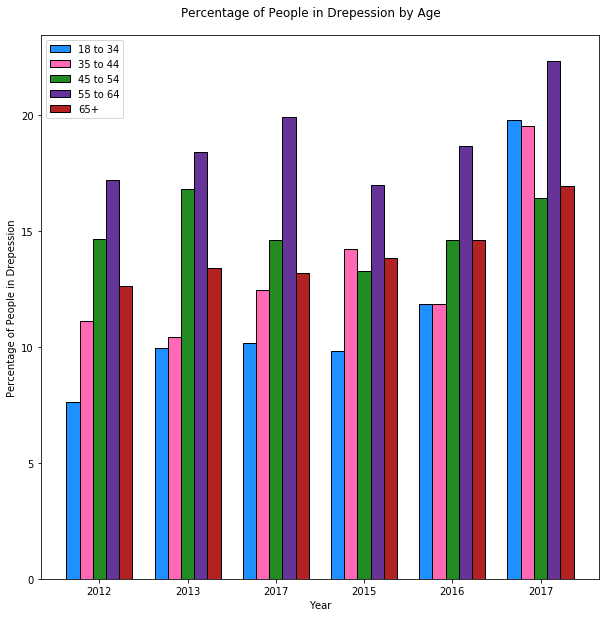

In [17]:
pos = np.arange(6)
bar_width = 0.15
age = ["18 to 34", "35 to 44", "45 to 54", "55 to 64", "65+"]
fig = plt.figure(figsize = (10, 10))
plt.bar(pos, age_1, bar_width, color = "dodgerblue", edgecolor = "black")
plt.bar(pos+bar_width, age_2, bar_width, color = "hotpink", edgecolor = "black")
plt.bar(pos+(bar_width*2), age_3, bar_width, color = "forestgreen", edgecolor = "black")
plt.bar(pos+(bar_width*3), age_4, bar_width, color = "rebeccapurple", edgecolor = "black")
plt.bar(pos+(bar_width*4), age_5, bar_width, color = "firebrick", edgecolor = "black")
plt.xticks(pos + bar_width * 2, [2012, 2013, 2017, 2015, 2016, 2017])
plt.xlabel("Year")
plt.ylabel("Percentage of People in Drepession")
plt.suptitle("Percentage of People in Drepession by Age", fontsize = 12, y = 0.92)
plt.legend(age)

#### 1.6 Total percentage of people having depression

In [18]:
percent_total = data[data['Strata Name'] == 'Total']['Percent']

Text(0.5, 0.92, 'Total Percentage of People in Drepession')

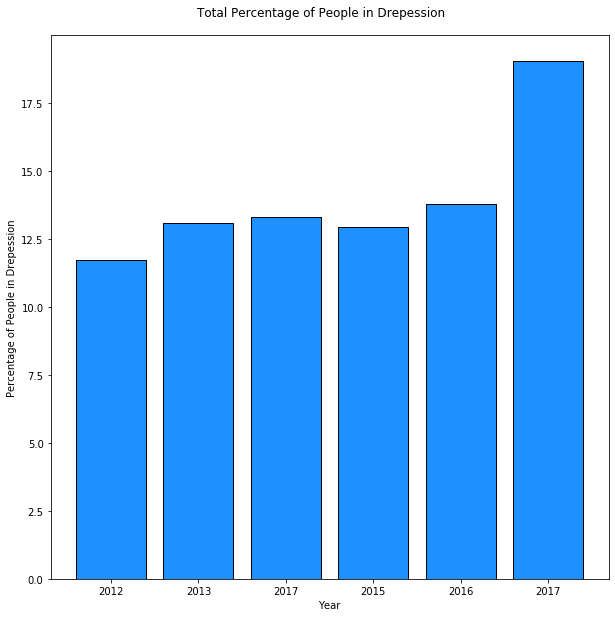

In [19]:
pos = np.arange(6)
fig = plt.figure(figsize = (10, 10))
plt.bar(pos, percent_total, color = "dodgerblue", edgecolor = "black")
plt.xticks(pos, [2012, 2013, 2017, 2015, 2016, 2017])
plt.xlabel("Year")
plt.ylabel("Percentage of People in Drepession")
plt.suptitle("Total Percentage of People in Drepession", fontsize = 12, y = 0.92)

From the results we can roughly see that there're many criterias affects the percentage of people having depression.  
For gender aspect, 10.64% of male has depression in average, while 17.20% of female does. Also, male has the variance of 4.13 comparing with the variance of 7.64 of female. The means give the idea that female may has higher chance to get depression than male. The variances indicate that male is more stable than female in getting depression.  
For education aspect, people who has some college or tech school background has the highest average perenctage of getting depression from 2012 to 2017. But this group of people has the second highest variance of 9.21. The people who has high school diploma or GRE certification has the highest variance of 13.26. This group of people has the tendancy that increase the most.  
For race aspect, the combine of other race has the highest average percentage of getting depression and variance. When we come to the named races, White people has the highest average percentage of getting depression and variance.  
For income aspect, the people earns less than 20,000 has extramly higher averrage percentage of getting depression and variance than other group of people. This group of people's average is 20.67% comparing to others' less than 15%. It's variance is 21.32, while others' are less than 10.
For age apsect, people who is between 55 to 64 has the highest percentage of getting depression, which is 18.91. The people who is between 18 to 34 has the highest variance, which is 15.16.
In gerneal, the people getting drepression has the tendancy of increasing.

### 2. Hypothesis Testing

In [20]:
def get_bootstrap_diff(a, b):
    np.random.seed(42)
    diff = []
    for i in range(10000):
        t = a + b
        np.random.shuffle(t)
        new_a = t[:len(a)]
        new_b = t[len(a):]
        diff.append(np.mean(new_a) - np.mean(new_b))
    return diff

In [21]:
def get_reject_more_and_p(level, diff, diference):
    print("Rejection Region: more than:", np.percentile(diff, level))
    #print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

In [22]:
def get_reject_less_and_p(level, diff, difference):
    print("Rejection Region: less than:", np.percentile(diff, level))
    #print("P-Value:", stats.percentileofscore(diff, difference)/100)

In [23]:
def bootstrap_testing(list1, list2, list1_name, list2_name, gorl, m_level):
    print("Mean of", list1_name, ":", np.mean(list1))
    print("Mean of", list2_name, ":", np.mean(list2))
    m_difference = np.mean(list1)- np.mean(list2)
    print("Difference in means :", m_difference)
    m_diff = get_bootstrap_diff(list1, list2)
    
    plt.hist(m_diff)
    plt.xlabel("Diff between " + list1_name + " and " + list2_name)
    plt.ylabel("Count")
    plt.suptitle("Boostrap Distribution of Difference Between Samples", fontsize = 10, y = 0.92)
    
    if(gorl == "greater"):
        get_reject_more_and_p(m_level, m_diff, m_difference)
    else:
        get_reject_less_and_p(m_level, m_diff, m_difference)
    return m_diff, m_difference

#### 2.1 Gender aspect

The perivous data shows that female has higher mean and variance than male, now I exam wether the gender is an issue.  
* ***Null Hypothesis:*** male and female have no difference in getting depression
* ***Alternative Hypothesis:*** male has less chance to get depression than female

Mean of male : 10.638333333333334
Mean of female : 17.205000000000002
Difference in means : -6.566666666666668
Rejection Region: less than: -4.223333333333331
P-Value: 0.0004


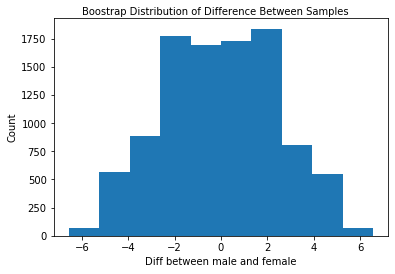

In [24]:
diff, difference = bootstrap_testing(percent_male.tolist(), percent_female.tolist(), "male", "female", "less", 5)
print("P-Value:", stats.percentileofscore(diff, difference) / 100)

The difference of mean between male and female is -6.57, which locates in the rejection region. Thus I can reject the null hypothesis that the male and female has no difference in getting depression, and accept the alternative hypothesis that the male has less chance getting depression than female, at significance level of 0.05.  
This finding shows that gender is an issue for affecting the people getting depression.And female is more like to get depression than male.

#### 2.2 Education aspect

The previous data shows education level can affect the chance of getting depression. By sorting the mean of chance of getting accroding to education in decresing order, we can have  
1. some college or tech shcool
2. high school graduate or GRE certificate
3. no high school diploma
4. college graduate or post grad  
</a>  
Now we can do the bootstrap testing repeatly to see if the "some college or tech school" background has the highest chance to get depression 

##### 2.2.1 "Some college or tech school" and "High school graduate or GRE certificate"

* **Null hypothesis:** People having some college or tech school background has the same chance to get depression as people having high school gradate or GRE certificate
* **Alternative hypothesis:** People having some college tech school background has higher chance to get depression than people having high school graduate or GRE certificate

Mean of Some college or tech school : 16.451666666666668
Mean of High school graduate or GRE certificate : 14.628333333333332
Difference in means : 1.823333333333336
Rejection Region: more than: 3.5166666666666657
P-Value: 0.20415000000000005


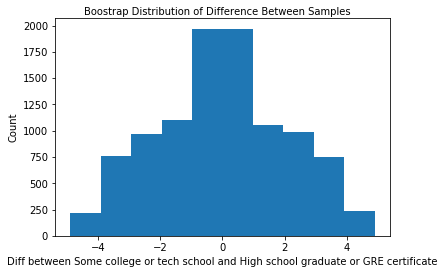

In [25]:
diff, difference = bootstrap_testing(percent_tech_school.tolist(), percent_high_school.tolist(), "Some college or tech school", "High school graduate or GRE certificate", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference between two sample is out side of the reject region, which indicates null hypothesis should be accepted at significance level of 0.05. That is, the people having some college or tech school background has the same chance to get depression as people having high school gradate or GRE certificate.

##### 2.2.2 "Some high school" and "No high school"

* **Null hypothesis:** People having some college or tech school background has the same chance to get depression as people having no high school diploma.
* **Alternative hypothesis:** People having some college tech school background has higher chance to get depression than people having no high school diploma.

Mean of Some college or tech school : 16.451666666666668
Mean of No high school diploma : 13.985
Difference in means : 2.4666666666666686
Rejection Region: more than: 2.4771666666666623
P-Value: 0.05159999999999998


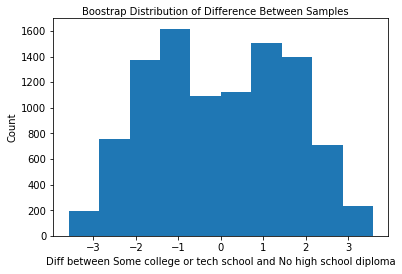

In [26]:
diff, difference = bootstrap_testing(percent_tech_school.tolist(), percent_no_school.tolist(), "Some college or tech school", "No high school diploma", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

At significance level of 0.05, the difference is outside of the reject region. So that we can accept the null hypothesis that people having some college or tech school background has the same chance to get depression as people having no high school diploma.

##### 2.2.3 "Some high school" and "College graduate"

* **Null hypothesis:** People having some college or tech school background has the same chance to get depression as people having college graduate or post grad.
* **Alternative hypothesis:** People having some college tech school background has higher chance to get depression than people having college graduate or post grad.

Mean of Some college or tech school : 16.451666666666668
Mean of College graduate or post grad : 12.146666666666668
Difference in means : 4.305
Rejection Region: more than: 3.155000000000001
P-Value: 0.006800000000000028


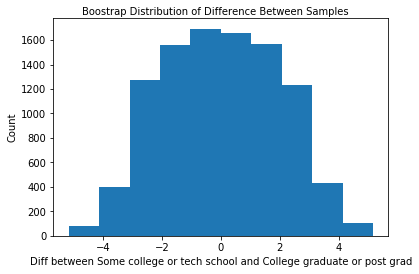

In [27]:
diff, difference = bootstrap_testing(percent_tech_school.tolist(), percent_college.tolist(), "Some college or tech school", "College graduate or post grad", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

At significance level of 0.05, the difference locates in the reject region, which requires us reject the null hypothesis and accept the alternative hypothesis. That is, the people having some college tech school background has higher chance to get depression than people having college graduate or post grad.

##### 2.2.4 conclusion of the effect of education aspect    
From the hypothesis testings, we can see that the "some college or tech school" has no statistic difference with "high school graduate or GRE certificate" and "no high school diploma" in the chance of getting depression. We could consider the people having any one of those education level have the same probability to get depression. The "College graduate or post grad" education level shows a difference in getting depression than the education level of "high school graduate or GRE certificate", which inidcates that people having college degree have less chance in getting depression. 

#### 2.3 Race aspect

The previous data shows education level can affect the chance of getting depression. By sorting the mean of chance of getting accroding to education in decresing order, we can have  
1. Other: 22.85
2. White: 17.36
3. Black: 13.97
4. Hispanic: 11.58
5. Asian/Pacific Islander: 5.52  
Considering that Other is the combination of a hugh amount of other races, in thie section, we just compute the named races and don't take Other into comperation.

##### 2.3.1 White vs Black

* **Null Hypothesis:** White and Black have the same chance in getting depression
* **Alternative Hypothesis:** White has higher chance in getting depression than Black

Mean of White : 17.36
Mean of Black : 13.968333333333334
Difference in means : 3.3916666666666657
Rejection Region: more than: 2.854999999999995
P-Value: 0.015800000000000036


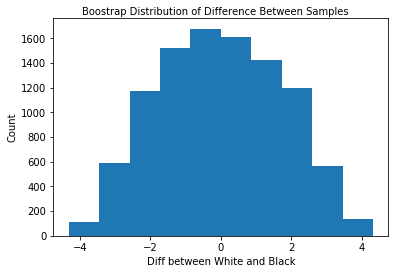

In [28]:
diff, difference = bootstrap_testing(percent_White.tolist(), percent_Black.tolist(), "White", "Black", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference White and Black is locates in the rejection region, which means null ghypothesis should be rejected. Thus, White has a higher in getting depression than Black.

##### 2.3.2 White vs Hispanic

* **Null Hypothesis:** White and Hispanic have the same chance in getting depression
* **Alternative Hypothesis:** White has higher chance in getting depression than Hispanic

Mean of White : 17.36
Mean of Hispanic : 11.575000000000001
Difference in means : 5.784999999999998
Rejection Region: more than: 3.8183333333333334
P-Value: 0.0034000000000000696


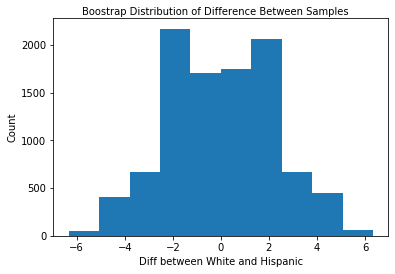

In [29]:
diff, difference = bootstrap_testing(percent_White.tolist(), percent_Hispanic.tolist(), "White", "Hispanic", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference between Whiteand Hispanic is locates in the rejection region; hull hypothesis need to be rejected. This indicates that White has higher chance in getting depression than Hispanic.

##### 2.3.3 White vs Asian/Pacific

* **Null Hypothesis:** White and Asian/Pacific have the same chance in getting depression
* **Alternative Hypothesis:** White has higher chance in getting depression than Asian/Pacific

Mean of White : 17.36
Mean of Asian/Pacific : 5.52
Difference in means : 11.84
Rejection Region: more than: 5.7333333333333325
P-Value: 0.00029999999999996696


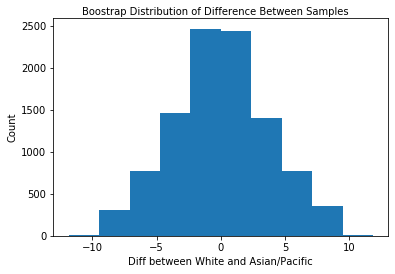

In [30]:
diff, difference = bootstrap_testing(percent_White.tolist(), percent_Asian.tolist(), "White", "Asian/Pacific", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference is inside of the rejection region, which requires us to reject the null hypothesis. That's saying, White has a higher chance in getting depression than Asian/Pacific.

##### 2.3.4 conclusion

From the bootstrap testings above, the White race has signficantly higher chance in getting depression than Black, Hispanic and Asian/Pacific races, at the significant level of 0.05. This indicates that race effects the chance of getting depression and White people has the highest chance.

#### 2.4 Income aspect

The previous data shows income level can affect the chance of getting depression. By sorting the mean of chance of getting accroding to income interval in decresing order, we can have  
1. less than \\$20,000: 20.67
2. \\$20,000 - \\$34,999: 14.03
3. \\$50,000 - \\$74,999: 13.84
4. \\$35,000 - \\$49,999: 13.56
5. \\$75,000 - \\$99,999: 12.33
6. greater than \\$100,000: 10.70  
The list indicates that earning less than \\$20,000 a year may has the highest chance to get depression comparing to other income level. This section will preform bootstrap testing of "less than \\$20,000" and other income level to find whether earning less than \\$20,000 has the highest chance to get depression or not.

##### 2.4.1 Less than \\$20,000 and \\$20,000 - \\$34,999

* **Null Hypothesis:** earning less than \\$20,000 has no difference in getting depression comparing with earning \\$20,000 - \\$34,999
* **Alternative Hypothesis:** earning less than \\$20,000 has higher chance in getting depression than earning \\$20,000 - \\$34,999

Mean of Less than 20k : 20.669999999999998
Mean of 20k - 35k : 14.033333333333331
Difference in means : 6.636666666666667
Rejection Region: more than: 4.67
P-Value: 0.0016500000000000403


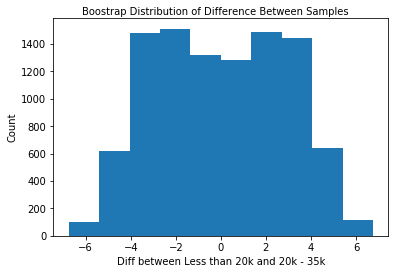

In [31]:
diff, difference = bootstrap_testing(income_1.tolist(), income_2.tolist(), "Less than 20k", "20k - 35k", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

Defference is in the rejection region, reject the null hypothesis. That means people earning less than\\$20,000 have higher chance in getting depression than those who earns \\$20,000 - \\$34,999.

##### 2.4.2 Less than \\$20,000 vs \\$50,000-\\$74,999

* **Null Hypothesis:** earning less than \\$20,000 has no difference in getting depression comparing with earning \\$50,000 - \\$74,999
* **Alternative Hypothesis:** earning less than \\$20,000 has higher chance in getting depression than earning \\$50,000 - \\$74,999

Mean of Less than 20k : 20.669999999999998
Mean of 50k - 75k : 13.836666666666668
Difference in means : 6.83333333333333
Rejection Region: more than: 5.003333333333332
P-Value: 0.005250000000000088


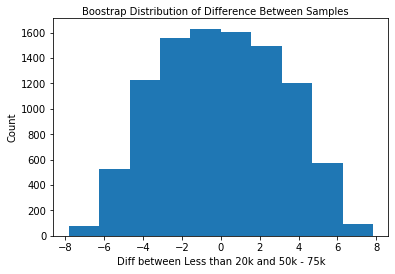

In [32]:
diff, difference = bootstrap_testing(income_1.tolist(), income_4.tolist(), "Less than 20k", "50k - 75k", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference locates inside of the rejection region. Null hypothesis rejected, alternative hypothesis accpeted. That means, people earning less than \\$20,000 a year will have a higher chance in getting depression than those who earns \\$50,000 - \\$74,999. 

##### 2.4.3 Less than \\$20,000 vs \\$35,000 - \\$49,999

* **Null Hypothesis:** earning less than \\$20,000 has no difference in getting depression comparing with earning \\$35,000 - \\$49,999
* **Alternative Hypothesis:** earning less than \\$20,000 has higher chance in getting depression than earning \\$35,000 - \\$49,999

Mean of Less than 20k : 20.669999999999998
Mean of 35k - 50k : 13.555
Difference in means : 7.114999999999998
Rejection Region: more than: 4.934999999999997
P-Value: 0.0019499999999998963


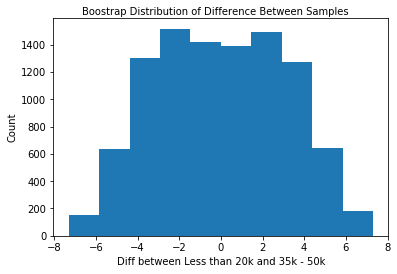

In [33]:
diff, difference = bootstrap_testing(income_1.tolist(), income_3.tolist(), "Less than 20k","35k - 50k", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference locates inside of the rejection region. Rejecting the null hypothesis and accepting the alternative hypothesis. People earning less than \\$20,000 has a higher chance in getting depression than those earning \\$35,000 - \\$49,999

##### 2.4.4 Less than \\$20,000 vs \\$75,000 - \\$99,999
* **Null Hypothesis:** earning less than \\$20,000 has no difference in getting depression comparing with earning \\$75,000 - \\$99,999
* **Alternative Hypothesis:** earning less than \\$20,000 has higher chance in getting depression than earning \\$75,000 - \\$99,999

Mean of Less than 20k : 20.669999999999998
Mean of $75k - $100 : 12.33
Difference in means : 8.339999999999998
Rejection Region: less than: 5.1800000000000015
P-Value: 0.0004999999999999449


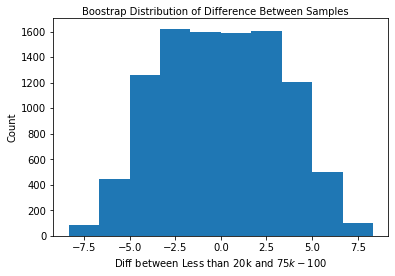

In [34]:
diff, difference = bootstrap_testing(income_1.tolist(), income_5.tolist(), "Less than 20k", "$75k - $100", "geater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference locates inside of the rejection region. Rejecting the null hypothesis and accepting the alternative hypothesis. People earning less than \\$20,000 has a higher chance in getting depression than those earning \\$75,000 - \\$99,999

##### 2.4.5 Less than \\$20,000 vs greater than \\$100,000
* **Null Hypothesis:** earning less than \\$20,000 has no difference in getting depression comparing with earning greater than \\$100,000
* **Alternative Hypothesis:** earning less than \\$20,000 has higher chance in getting depression than earning greater than \\$100,000

Mean of Less than 20k : 20.669999999999998
Mean of  Greater than 100k : 10.695
Difference in means : 9.974999999999998
Rejection Region: more than: 6.178333333333335
P-Value: 0.0


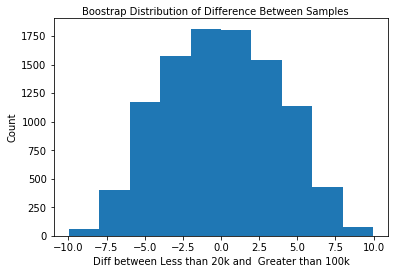

In [35]:
dif, difference = bootstrap_testing(income_1.tolist(), income_6.tolist(), "Less than 20k", " Greater than 100k", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference locates in the rejection region. Rejecting the null hypothesis and accepting the alternative hypothesis, which means that the people earning less than \\$20,000 has a higher chance in getting depression than the people earning greater than \\$100,000 a year.

##### 2.4.6 conclusion
From the bootstrap testings, we can see that at significant level of 0.05, People earning less than \\$20,000 has a statistically higher chance in getting depression than people have higher income. We can said that income level will effect the chance in getting depression and those who earning less than \\$20,000 a year has the highest chance in getting depression.

#### 2.5 Age aspect

From the data visilization section we can see that age can be a factor which will affect the chance in getting depression. By sorting the mean of people got depression grouped by age, we can have the list:
1. 55-64: 18.91
2. 45-54: 15.06
3. 65+  : 14.10
4. 35-44: 13.23
5. 18-34: 11.54   
This list suggests that the people between 55-64 years old has the highest chance in getting depression. We will use bootstrap testing repeatlly, to exam whether the people in 55-64 years old has the highest chance in getting depression or not.

##### 2.5.1 55-64 vs 45-54
* **Null Hypothesis:** People in 55-64 years old has the same chance in getting depression comparing with thsoe in 45-54 years old.
* **Alternative Hypothesis:** People in 55-64 years old has the higher chance in getting depression than those who is 45-54 years old.

Mean of 55-64 : 18.90833333333333
Mean of 45-54 : 15.059999999999997
Difference in means : 3.8483333333333345
Rejection Region: more than: 2.4816666666666656
P-Value: 0.00010000000000010001


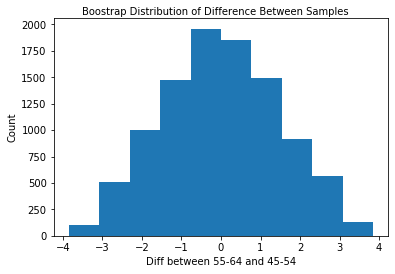

In [36]:
diff, difference = bootstrap_testing(age_4.tolist(), age_3.tolist(), "55-64", "45-54", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference locates inside of the rejection region, which requires us to reject the null hypothesis and to accept the alternative hypothesis. Thus, people in 55-64 years old is more likely to get depression than those in 45-54 years old.

##### 2.5.2 55-64 vs 65+
* **Null Hypothesis:** People in 55-64 years old has the same chance in getting depression comparing with thsoe in 65+ years old.
* **Alternative Hypothesis:** People in 55-64 years old has the higher chance in getting depression than those who is 65+ years old.

Mean of 55-64 : 18.90833333333333
Mean of 65+ : 14.104999999999999
Difference in means : 4.803333333333333
Rejection Region: more than: 2.9833333333333307
P-Value: 0.00045000000000006146


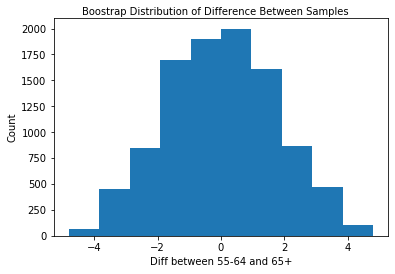

In [37]:
diff, difference = bootstrap_testing(age_4.tolist(), age_5.tolist(), "55-64", "65+", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference is in the rejection region, which needs us to reject the null hypothesis and accept the altenative hypothesis. That is, people in 55-64 years old has a higher chance in getting depression than people in 65+ years old.

##### 2.5.3 55-64 vs 35-44
* **Null Hypothesis:** People in 55-64 years old has the same chance in getting depression comparing with thsoe in 35-44 years old.
* **Alternative Hypothesis:** People in 55-64 years old has the higher chance in getting depression than those who is 35-44 years old.

Mean of 55-64 : 18.90833333333333
Mean of 35-44 : 13.265
Difference in means : 5.643333333333331
Rejection Region: more than: 3.7666666666666657
P-Value: 0.005299999999999971


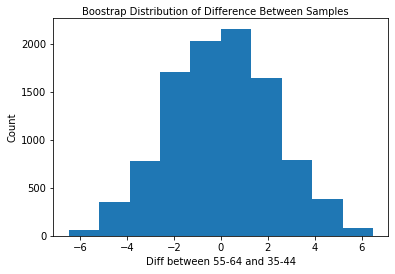

In [38]:
diff, difference = bootstrap_testing(age_4.tolist(), age_2.tolist(), "55-64", "35-44", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference is in the rejection region, so we reject the null hypothesis and accept the alternative hypothesis. That shows people in 55-64 years old is more likely to get depression than people in 35-44 years old.

##### 2.5.4 55-64 vs 18-34
* **Null Hypothesis:** People in 55-64 years old has the same chance in getting depression comparing with thsoe in 18-34 years old.
* **Alternative Hypothesis:** People in 55-64 years old has the higher chance in getting depression than those who is 18-34 years old.

Mean of 55-64 : 18.90833333333333
Mean of 18-34 : 11.536666666666667
Difference in means : 7.371666666666664
Rejection Region: more than: 4.961666666666666
P-Value: 0.005349999999999966


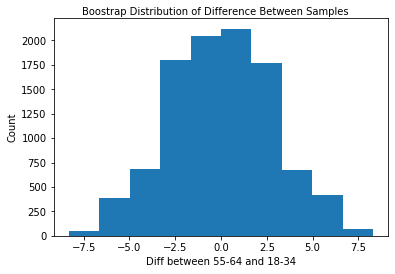

In [39]:
diff, difference = bootstrap_testing(age_4.tolist(), age_1.tolist(), "55-64", "18-34", "greater", 95)
print("P-Value:", (1-(stats.percentileofscore(diff, difference) / 100)))

The difference is in the rejection region. We can reject the null hypothesis and accept the alternative hypothesis. This indicates that people in 55-64 years old has a higher chance in getting depression than people in 18-34 years old.

##### 2.5.5 conclusion
From the bootstrap testings we did above, we can see that the people in 55-64 years old is more likely to get depression than other ages. This finding can tell that the age effects people's chance in getting depression and the people in 55-64 years old are most likely get depression, at significant level of 0.005.

#### 2.6 Summary of Hypothesis Testing Section
From the hypothesis testing we did above, we can tell that education gender, education level, races, income level and age can effect people's probability in getting depression.
1. For gender aspect, female is more likely to get depression than male.
2. For education aspect, college degree is a turning point. Having college graduate or post grad is less likely to get depression than having some college or less.
3. For race aspect, among the named races, white people is more danger than other races; white people has the highest chance in getting depression comparing to other races
4. For income aspect, people earning less than \\$20,000 are the group of people that has the highest chance in getting depression.
5. For age aspect, people in 55-64 years old is most likely to get depression.

### 3 Regression

In [40]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [41]:
year = []
for i in range(2012, 2018):
    year.append(i)

Text(0.5, 0.92, 'Percentage of people got depression vs. Years')

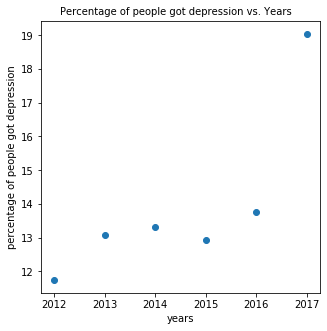

In [42]:
fig = plt.figure(figsize =(5, 5))
plt.scatter(year, percent_total)
plt.ylabel("percentage of people got depression")
plt.xlabel("years")
plt.suptitle("Percentage of people got depression vs. Years", fontsize = 10, y = 0.92)

We can see that at 2017 the percentage of people got depression has a high increase. Since the data set doesn't provide enough data, we consider the 2017's total percentage of people got depression is an outliter.

In [43]:
new_year = np.asarray(year[:len(year) - 1])
print(new_year)
new_total = percent_total[:len(percent_total) - 1].tolist()
print(new_total)

[2012 2013 2014 2015 2016]
[11.74, 13.08, 13.3, 12.92, 13.77]


Text(0.5, 0.92, 'Percentage of people got depression vs. Years')

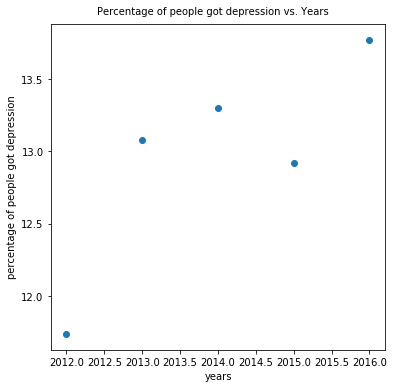

In [44]:
fig = plt.figure(figsize =(6,6))
plt.scatter(new_year, new_total)
plt.ylabel("percentage of people got depression")
plt.xlabel("years")
plt.suptitle("Percentage of people got depression vs. Years", fontsize = 10, y = 0.92)

In [45]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(new_year, new_total)

Text(0.5, 0.92, 'Percentage of people got depression vs. Years')

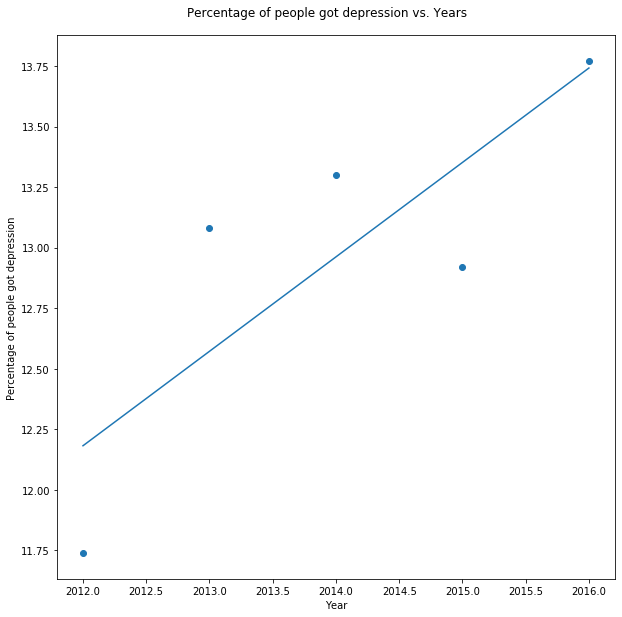

In [46]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(new_year, new_total)
sorted_order = np.argsort(new_year)
plt.plot(new_year[sorted_order], predictions[sorted_order])
plt.xlabel("Year")
plt.ylabel("Percentage of people got depression")
plt.suptitle("Percentage of people got depression vs. Years", fontsize = 12, y = 0.92)

Text(0.5, 0.92, 'Residuals')

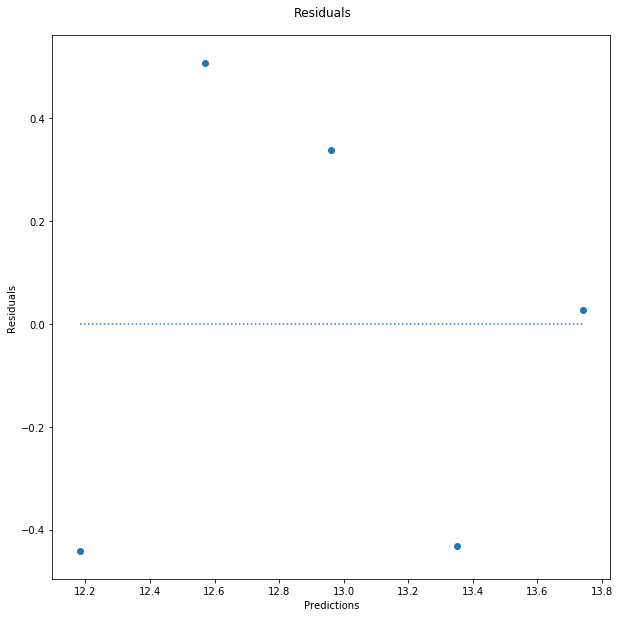

In [47]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle = "dotted")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
fig.suptitle("Residuals", fontsize = 12, y = 0.92)

In [48]:
corr, p = stats.pearsonr(new_year, new_total)
r_sq = np.var(predictions) / np.var(new_total)
print("Slope:", slope)
print("Correlation:", corr)
print("P-Value:", p)
print("R Square:", r_sq)

Slope: 0.3899999999999999
Correlation: 0.8174681592678833
P-Value: 0.09100775190715722
R Square: 0.6682541914167753


The correlation of 0.82 suggests that the year and percentage of people got depression have a strong relation. The r^2 of 0.67 is the the 67% of the percentage data can be represented by the year. But since the data set is too small, we can make sure that the relation is linear even we have a high R square value. But the high correlation value can tell that the percentage of people got depression With a positive slope, the percentage of people got depression increase along with the increase of year.

### Summary
By preferming the correlation analysis, we get a correlation of 0.81 and a slope of 0.39. Those two data suggest that percentage of people got depression increases accroding to the increase of year, in other word, more and more people get depression.  
By preferming the hypothesis testings, we can learn that percentage of people got depression will be affected by gender, education level, race, income level or age.
1. Female is more likely getting depression than male.
2. Having college graduated or post grad is less likely getting depression than those who doesn't.
3. White people is more likely getting depression than other races.
4. People earning less than \\$20,000 a year is more likely getting depression than others who earns more.
5. 55-64 years old is the age interval having highest chance in getting depression.

#### Self-assessment
From this project, I enjoy the applying the knowledge we learned from the lectures to the real-world data. At the beginning when I found this data set I was quite happy that I found such a detailed and completed data set, even though it is somewhat out of date. But when I started working on it I found that this data set didn't provide many flexibility. Unlike the example projects, it was well categorized and I almost cannot have as many as data I can play with. This is the first limitation I came up with. The second challenge I met is refactoring. At the beginning when I worked on the hypothesis testing, I am not expected to preform bootstrap repeatlly. In fact, because my data isn't in normal distribution, I can only use bootstrap testing for the entire hypothesis testing section. When I realized I was working on the hypothesis testing for education aspect, which means I've already finished the testing for gender aspect and race aspcet by typing the similar code manually. So I create a function, bootstrap_testing, to make the work easier. And when I was testing this function, I met my thrid challenge. I used to put the p-value function inside of the integrated function, but I found that it's not working properly. When I kept it inside of the integraded function, it gave me a worng p-value, but with the same code, when I bring it out of the integrated fucntion, it worked. For more testing I found that the finding p-value function is not using the correct diff list, even though I specific the list as a parameter. Considering with the same code and same way of calling that function but end up with a difference result, I addressed it may be the scope problem. But I cannot come up with a way to fix this problem, I brought out the finding p-value funciton and called it outside of the integrated funcion.  
I enjoy solving those challenges even though I can't have a solution for some of them. But the process that I was looking for a solution is really deeper my understanding on what we've learned and the Python language.